In [1]:
from testsCBS import test_cbs_on_map, test_cbs_on_map_dynamic

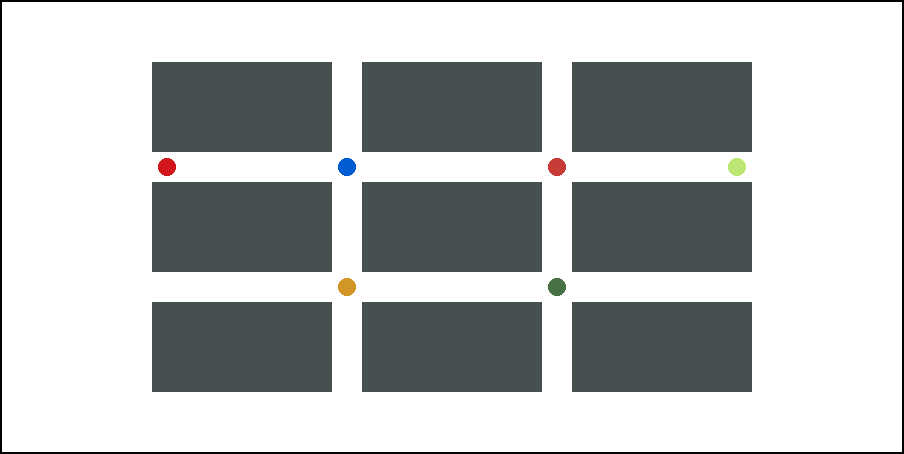

In [2]:
test_cbs_on_map_dynamic(3, 0)